In [56]:
#immport libraries and xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import xgboost as xgb

In [57]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True).close
df.index = df.index.to_pydatetime()
df.head()

2017-01-02 09:15:00+05:30    8178.70
2017-01-03 09:15:00+05:30    8188.60
2017-01-04 09:15:00+05:30    8196.55
2017-01-05 09:15:00+05:30    8269.90
2017-01-06 09:15:00+05:30    8247.85
Name: close, dtype: float64

In [58]:
df = pd.DataFrame(df)
df

,close
2017-01-02 09:15:00+05:30,8178.70
2017-01-03 09:15:00+05:30,8188.60
2017-01-04 09:15:00+05:30,8196.55
2017-01-05 09:15:00+05:30,8269.90
2017-01-06 09:15:00+05:30,8247.85
...,...
2022-12-26 09:15:00+05:30,18010.30
2022-12-27 09:15:00+05:30,18136.00
2022-12-28 09:15:00+05:30,18109.25
2022-12-29 09:15:00+05:30,18207.10


<AxesSubplot:>

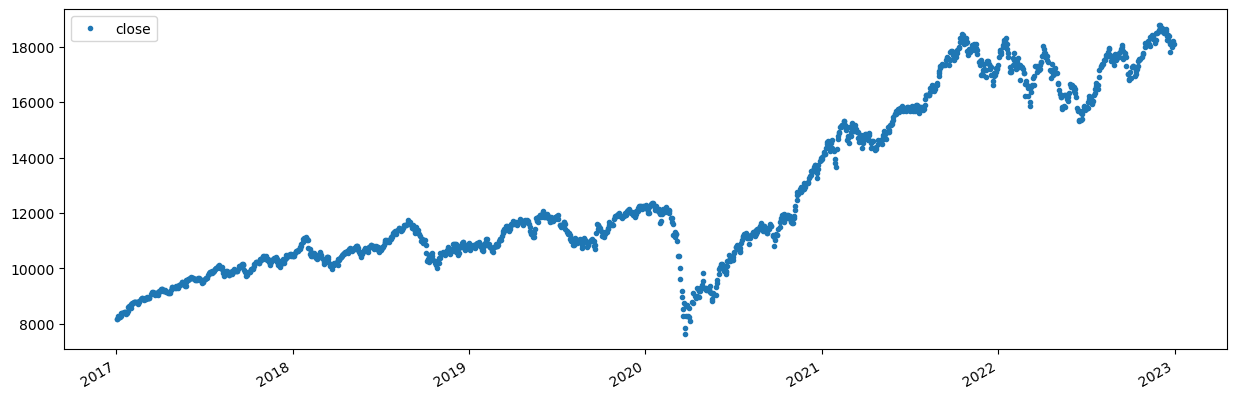

In [59]:
#plot data
df.plot(style='.',figsize=(15,5))

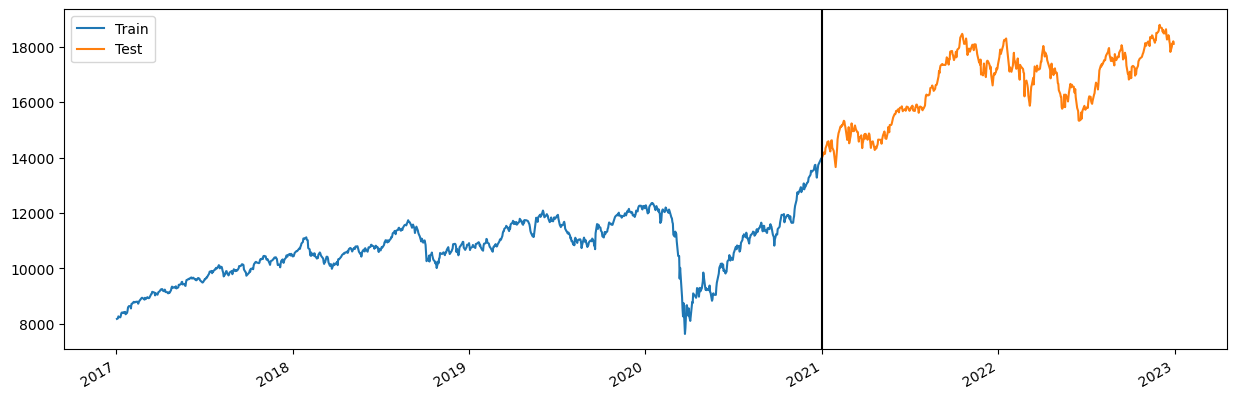

In [60]:
#train/test split
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='01-01-2021']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [61]:
df.loc[(df.index>'01-01-2021')&(df.index<'01-08-2021')]

,close
2021-01-01 09:15:00+05:30,14015.10
2021-01-04 09:15:00+05:30,14144.50
2021-01-05 09:15:00+05:30,14196.35
2021-01-06 09:15:00+05:30,14132.80
2021-01-07 09:15:00+05:30,14148.50


In [62]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [63]:
#feature extraction
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

train['day_of_week'] = train.index.dayofweek
train['month'] = train.index.month
train['year'] = train.index.year
train['day_of_year'] = train.index.dayofyear

test['day_of_week'] = test.index.dayofweek
test['month'] = test.index.month
test['year'] = test.index.year
test['day_of_year'] = test.index.dayofyear

In [64]:
train.head

<bound method NDFrame.head of                               close  day_of_week  month  year  day_of_year
2017-01-02 09:15:00+05:30   8178.70            0      1  2017            2
2017-01-03 09:15:00+05:30   8188.60            1      1  2017            3
2017-01-04 09:15:00+05:30   8196.55            2      1  2017            4
2017-01-05 09:15:00+05:30   8269.90            3      1  2017            5
2017-01-06 09:15:00+05:30   8247.85            4      1  2017            6
...                             ...          ...    ...   ...          ...
2020-12-24 09:15:00+05:30  13740.40            3     12  2020          359
2020-12-28 09:15:00+05:30  13883.25            0     12  2020          363
2020-12-29 09:15:00+05:30  13928.10            1     12  2020          364
2020-12-30 09:15:00+05:30  13973.65            2     12  2020          365
2020-12-31 09:15:00+05:30  13967.20            3     12  2020          366

[987 rows x 5 columns]>

<AxesSubplot:xlabel='day_of_week', ylabel='close'>

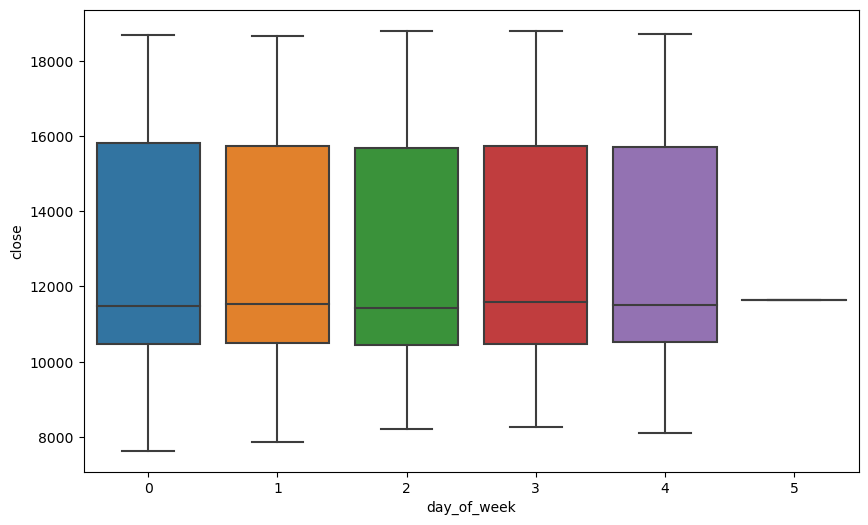

In [65]:
#visualize feature vs target
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,x='day_of_week',y='close')

<AxesSubplot:xlabel='month', ylabel='close'>

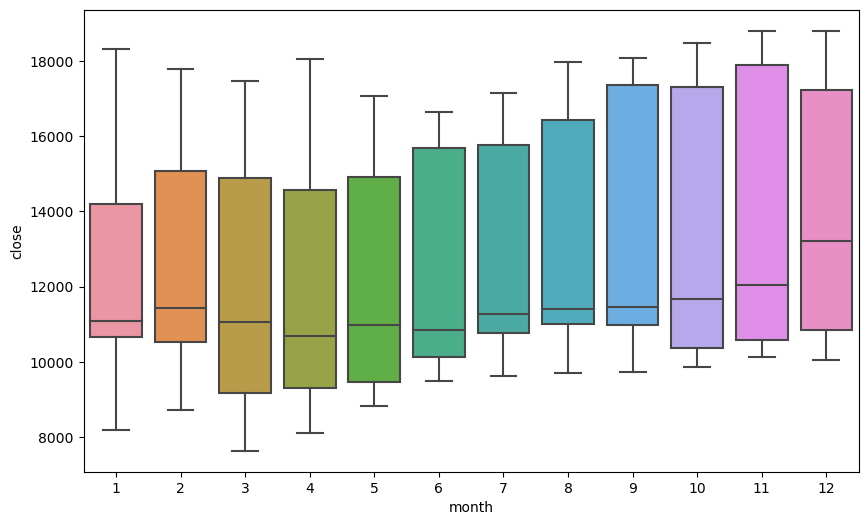

In [66]:
#visualize feature vs target
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,x='month',y='close')

<AxesSubplot:xlabel='year', ylabel='close'>

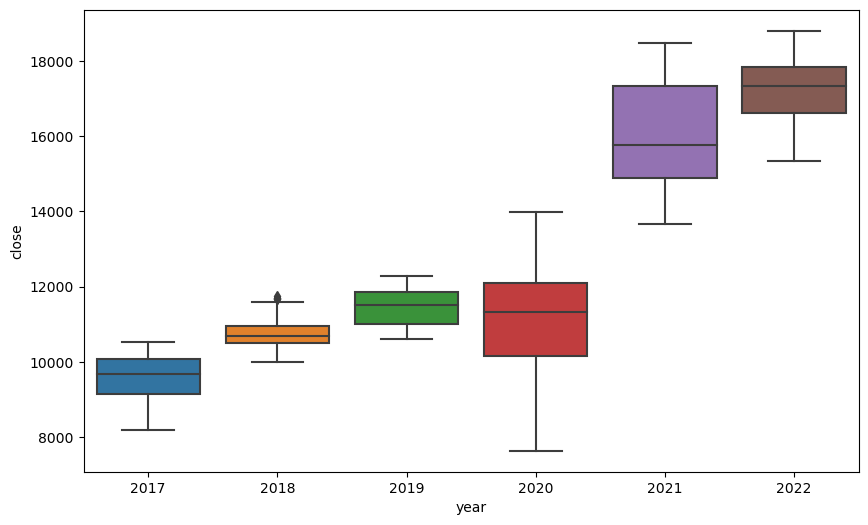

In [67]:
#visualize feature vs target
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,x='year',y='close')

In [69]:
train.columns

Index(['close', 'day_of_week', 'month', 'year', 'day_of_year'], dtype='object')

In [72]:
#store features
features=['day_of_week', 'month', 'year', 'day_of_year']
target='close'

In [73]:
#x and y data for feature and target
x_train=train[features]
y_train=train[target]

x_test=test[features]
y_test=test[target]

In [74]:
#create model
from sklearn.metrics import mean_squared_error

reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test,y_test)],verbose=True)

[0]	validation_0-rmse:7580.72960	validation_1-rmse:13370.10618
[1]	validation_0-rmse:5340.43548	validation_1-rmse:11018.16239
[2]	validation_0-rmse:3762.68595	validation_1-rmse:9435.53994
[3]	validation_0-rmse:2654.87198	validation_1-rmse:8302.15725
[4]	validation_0-rmse:1879.08191	validation_1-rmse:7530.04985
[5]	validation_0-rmse:1335.14740	validation_1-rmse:6979.87211
[6]	validation_0-rmse:953.16149	validation_1-rmse:6578.60551
[7]	validation_0-rmse:691.29322	validation_1-rmse:6308.33907
[8]	validation_0-rmse:499.27477	validation_1-rmse:6115.22323
[9]	validation_0-rmse:367.26792	validation_1-rmse:5981.10216
[10]	validation_0-rmse:277.14981	validation_1-rmse:5887.97284
[11]	validation_0-rmse:219.52251	validation_1-rmse:5824.97058
[12]	validation_0-rmse:179.43604	validation_1-rmse:5777.80725
[13]	validation_0-rmse:149.90521	validation_1-rmse:5744.27252
[14]	validation_0-rmse:132.59702	validation_1-rmse:5720.35957
[15]	validation_0-rmse:122.88854	validation_1-rmse:5701.82829
[16]	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [75]:
#feature importance
reg.feature_importances_

array([0.00182424, 0.33449242, 0.4767981 , 0.1868853 ], dtype=float32)

<AxesSubplot:>

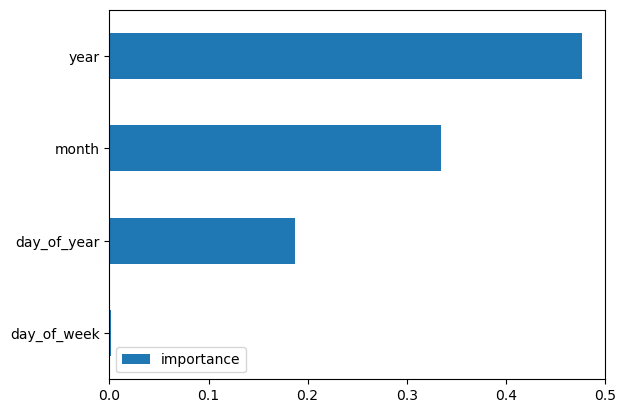

In [77]:
fi=pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh')

In [80]:
#forecast data
test['prediction']=reg.predict(x_test)
df=df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

<AxesSubplot:>

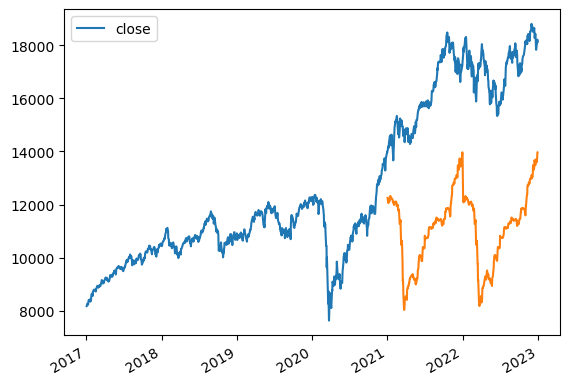

In [82]:
#plot predictions- model isn't good
df[['close']].plot()
df['prediction'].plot()

In [84]:
#RMSE Score
np.sqrt(mean_squared_error(test['close'],test['prediction']))

5663.604356173148